<a href="https://colab.research.google.com/github/yurifillippo/datascience/blob/master/Casos_de_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

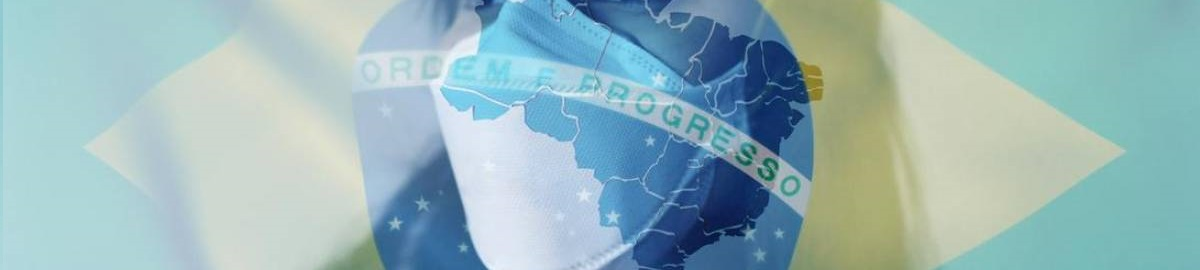

# COVID-19

> A doença do coronavírus **(COVID-19)** é uma doença infeciosa causada por um coronavírus descoberto recentemente.
A maioria das pessoas que contraem a COVID-19 tem sintomas ligeiros a moderados e recupera sem necessitar de tratamento especial.

**COMO SE PROPAGA?**

>* O vírus que causa a COVID-19 transmite-se principalmente através das gotículas 
que são geradas quando uma pessoa infetada tosse, espirra ou expira. Estas gotículas são demasiado pesadas para ficarem suspensas no ar e depositam-se rapidamente em pavimentos ou superfícies.
Qualquer pessoa pode ser infetada ao inspirar o vírus se estiver a uma grande proximidade de alguém com COVID-19 ou tocar numa superfície contaminada e, em seguida, nos olhos, no nariz ou na boca.

Vamos trabalhar com um conjunto de dados mantidos por [*Our World in Data*](https://ourworldindata.org/coronavirus). É atualizado diariamente e inclui dados sobre casos confirmados, mortes e testes, além de outras variáveis ​​de interesse em potencial.

O conjunto de dados você pode encontrar [*neste link*](https://github.com/owid/covid-19-data/tree/master/public/data).

### **DICIONÁRIO DE VARIÁVEIS:**

>  * **iso_code**:	
        ISO 3166-1 alfa-3 - códigos de países com três letras
>  * **continent**:
        Continente da localização geográfica
 * **location**:
        Localização geográfica
 * **date**:
        Data da observação
 * **total_cases**:
        Total de casos confirmados de COVID-19
 * **new_cases**:
        Novos casos confirmados de COVID-19
 * **total_deaths**:
        Total de mortes atribuídas ao COVID-19
 * **new_deaths**:
        Novas mortes atribuídas ao COVID-19
 * **total_cases_per_million**:
        Total de casos confirmados de COVID-19 por 1.000.000 de pessoas
 * **new_cases_per_million**:
        Novos casos confirmados de COVID-19 por 1.000.000 de pessoas
 * **total_deaths_per_million**:
        Total de mortes atribuídas ao COVID-19 por 1.000.000 de pessoas
 * **new_deaths_per_million**:
        Novas mortes atribuídas ao COVID-19 por 1.000.000 de pessoas
 * **total_tests**:
        Total de testes para COVID-19
 * **new_tests**:
        Novos testes para COVID-19
 * **new_tests_smoothed:**
        Novos testes para COVID-19 (suavizado por 7 dias). Para países que não relatam dados de teste diariamente, assumimos que o teste mudou igualmente diariamente em qualquer período em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que são calculados em média em uma janela de 7 dias consecutivos
 * **total_tests_per_thousand**:
        Total de testes para COVID-19 por 1.000 pessoas
 * **new_tests_per_thousand**:
        Novos testes para COVID-19 por 1.000 pessoas
 * **new_tests_smoothed_per_thousand**:
        Novos testes para COVID-19 (suavizado por 7 dias) por 1.000 pessoas
 * **tests_units**:
        Unidades usadas pelo local para relatar seus dados de teste
 * **stringency_index**:
        Índice de Estresse da Resposta do Governo: medida composta baseada em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibições de viagens, redimensionados para um valor de 0 a 100 (100 = resposta mais estrita) 
 * **population**:
        População em 2020
 * **population_density**:
        Número de pessoas divididas por área terrestre, medida em quilômetros quadrados, no ano mais recente disponível
 * **median_age**:
        Idade média da população, projeção da ONU para 2020
 * **aged_65_older**:
        Proporção da população com 65 anos ou mais, ano mais recente disponível
 * **aged_70_older**:
        Percentagem da população com 70 anos ou mais em 2015
 * **gdp_per_capita**:
        Produto interno bruto com paridade do poder de compra (dólares internacionais constantes de 2011), último ano disponível
extreme_poverty	Percentagem da população que vive em extrema pobreza, último ano disponível desde 2010
 * **cvd_death_rate**:
        Taxa de mortalidade por doenças cardiovasculares em 2017
diabetes_prevalence	Prevalência de diabetes (% da população entre 20 e 79 anos) em 2017
 * **female_smokers**:
        Percentagem de mulheres que fumam, último ano disponível
 * **male_smokers**:
        Proporção de homens que fumam, último ano disponível
 * **handwashing_facilities**:
        Percentagem da população com instalações básicas de lavagem das mãos nas instalações, último ano disponível
 * **hospital_beds_per_thousand**:
        Camas de hospital por 1.000 pessoas, último ano disponível desde 2010
 * **life_expectancy**:
        Expectativa de vida no nascimento em 2019


### **Análise Exploratória**

>Iniciaremos a análise exploratória identificando os tipos de dados, formato, tamanho do dataset, entre outros. A partir dos dados organizados, a análise será realizada a fim de identificar correlações e informações úteis referente ao COVID-19 no mundo e somente no Brasil.

In [ ]:
# importar os pacotes necessários
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Importar estilo seaborn
sns.set_style('dark')

#importar dataset
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

#Ver tamanho do dataset
print("Variáveis: {}".format(df.shape[1]))
print("Entradas: {}".format(df.shape[0]))

#Ver primeiras entradas do dataset
df.head()

Variáveis: 34
Entradas: 31915


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


> Somente vendo as primeiras entradas podemos identificar um dataset com 34 variáveis e 28714 entradas, todas as entradas por datas e país, e alguns valores nulos que serão analisados mais a frente.



In [ ]:
#Verificar tipo das variáveis
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Como podemos ver acima, com excessão de ***date*** os demais dados estão com seu formado correto, iremos converte-la para o formato *datetime64*.

In [ ]:
# converter coluna date em datetime
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")

In [ ]:
#Analisar quantidade de valores ausentes nas variáveis
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

new_tests                          0.695598
new_tests_per_thousand             0.695598
total_tests_per_thousand           0.687075
total_tests                        0.687075
new_tests_smoothed_per_thousand    0.659063
new_tests_smoothed                 0.659063
tests_units                        0.635093
handwashing_facilities             0.588908
extreme_poverty                    0.405107
male_smokers                       0.292088
female_smokers                     0.283566
stringency_index                   0.188595
hospital_beds_per_thousand         0.179915
aged_65_older                      0.112486
gdp_per_capita                     0.110293
aged_70_older                      0.104120
median_age                         0.099483
cardiovasc_death_rate              0.098982
diabetes_prevalence                0.068745
population_density                 0.044807
life_expectancy                    0.013943
new_deaths_per_million             0.012126
total_deaths_per_million        

Todas as variáveis relacionadas a testes se encontram com mais de 60% de seus valores ausentes, como eles começaram a ser realizados após algum tempo da pandemia começar a se espalhar, poderemos considerar os valores nulos como validos.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


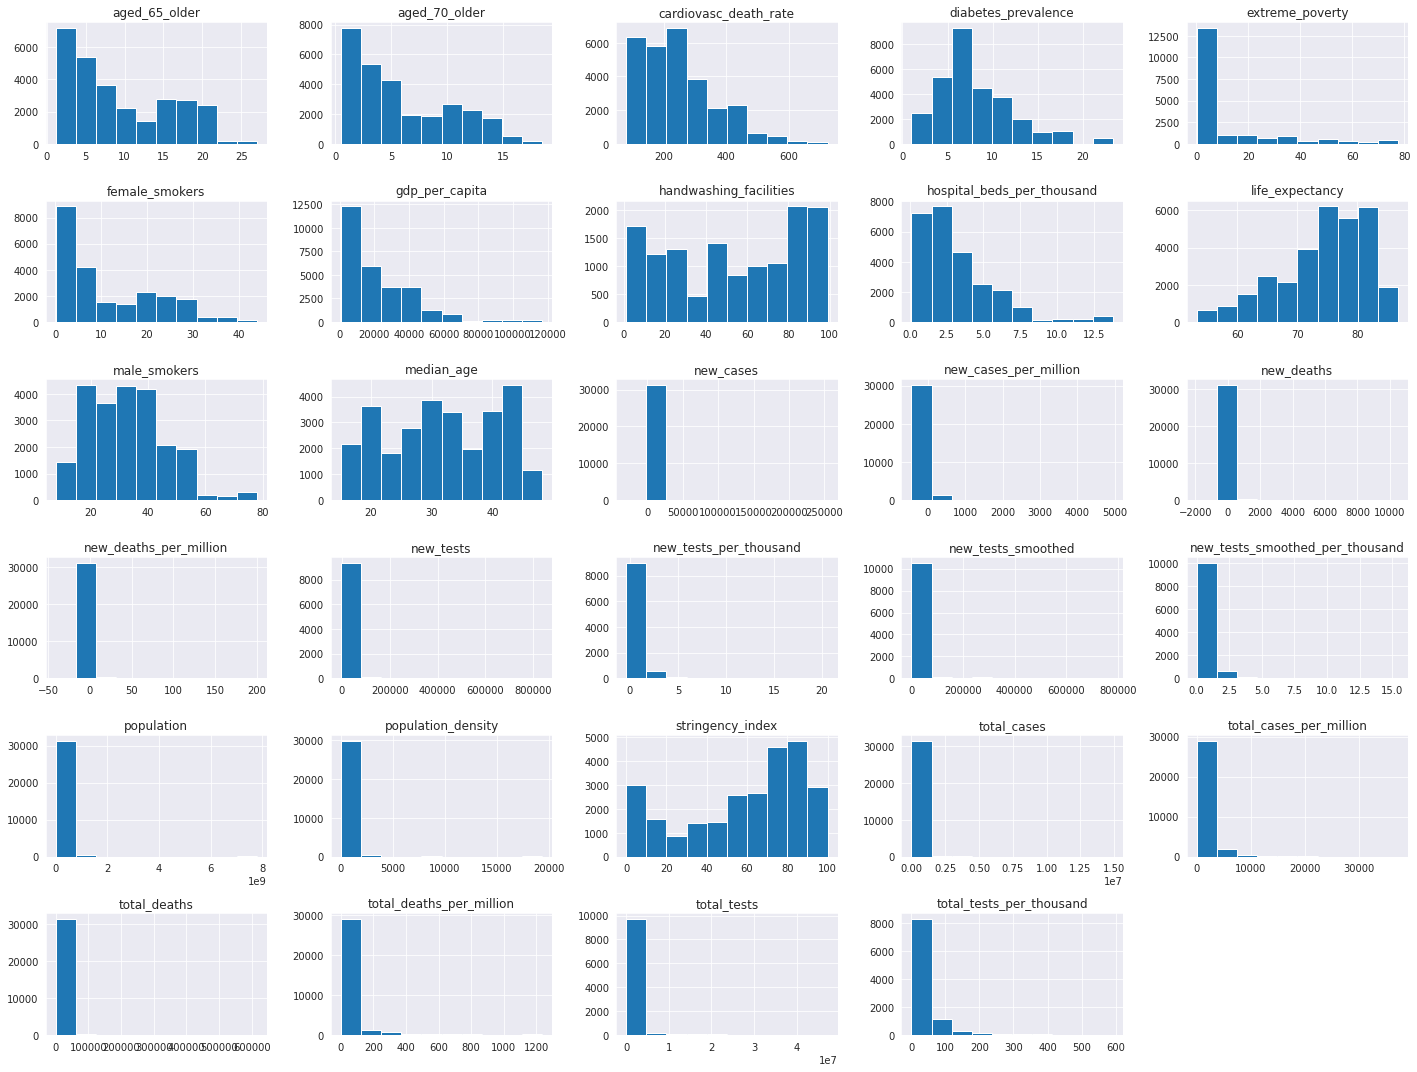

In [ ]:
#Plotar histograma para identificar algum possível valor outlier por erro de digitação ou algum outro erro
fig, ax = plt.subplots(figsize=(20,15))
df.hist(ax=ax)
plt.tight_layout()

In [ ]:
#Exibir informações estatísticas do dataset
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,3.159200e+04,31592.000000,31592.000000,31592.000000,31528.000000,31528.000000,31528.000000,31528.000000,9.987000e+03,9715.000000,9987.000000,9715.000000,10881.000000,10881.000000,25896.000000,3.185100e+04,30485.000000,28740.000000,28325.000000,28592.000000,28395.000000,18986.000000,28756.000000,29721.000000,22865.000000,22593.000000,13120.000000,26173.000000,31470.000000
mean,4.620240e+04,942.676374,2493.649500,39.017283,1028.674138,17.189552,38.990180,0.528490,7.546126e+05,16410.589913,31.064868,0.588036,15613.865913,0.558233,58.291154,9.542263e+07,369.212584,31.678511,9.475390,6.008009,21641.466963,11.398736,249.323672,8.040828,11.009599,32.643039,53.381807,3.151273,74.275631
std,4.676466e+05,8586.875156,23816.950667,340.669375,2536.176096,62.894271,120.793902,2.990482,2.889712e+06,57849.717739,54.540768,1.101922,52874.632948,0.958222,30.111697,6.409421e+08,1685.614449,9.009667,6.385378,4.370327,20745.384183,18.661122,118.065472,4.112928,10.512555,13.335053,31.420406,2.554006,7.307569
min,0.000000e+00,-29726.000000,0.000000,-1918.000000,0.000000,-437.881000,0.000000,-41.023000,1.000000e+00,-3743.000000,0.000000,-0.398000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,1.900000e+01,0.000000,0.000000,0.000000,7.314000,0.000000,0.000000,0.000000,2.661950e+04,857.500000,1.543000,0.055000,945.000000,0.058000,37.960000,1.886202e+06,39.497000,24.400000,3.655000,2.162000,6171.884000,0.500000,153.493000,5.310000,1.900000,21.400000,22.863000,1.380000,70.600000
50%,3.810000e+02,5.000000,8.000000,0.000000,133.738000,0.707000,1.724000,0.000000,1.135570e+05,2930.000000,8.829000,0.239000,3245.000000,0.253000,68.520000,8.947027e+06,90.672000,31.800000,7.104000,4.458000,15183.616000,1.700000,235.954000,7.110000,6.434000,31.400000,59.550000,2.540000,75.860000
75%,4.444750e+03,93.000000,98.000000,2.000000,843.888000,9.935750,19.575750,0.128000,4.394700e+05,9770.000000,38.800500,0.710500,9786.000000,0.703000,82.410000,3.236600e+07,222.873000,40.100000,14.864000,9.720000,33132.320000,14.800000,318.949000,10.080000,19.600000,40.900000,83.741000,4.210000,80.100000
max,1.489052e+07,254463.000000,616317.000000,10512.000000,37288.359000,4944.376000,1237.551000,200.040000,4.722438e+07,837392.000000,591.938000,20.611000,781156.000000,15.456000,100.000000,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


In [ ]:
df.location.unique()[210:]

array(['World', 'International'], dtype=object)

Após analisar o histograma e a análise estatística, podemos identificar alguns pontos para darmos atenção:

> As variáveis abaixo apresentam valores negativos:
* new_cases
* new_deaths
* new_cases_per_million
* new_deaths_per_million
* new_tests
* new_tests_per_thousand

De acordo com a fonte de dados "*... valores negativos em casos e mortes podem aparecer quando um país envia uma correção ao ECDC, porque anteriormente havia superestimado o número de casos / mortes."*

Outro ponto que vale ressaltar é que o dataset apresenta entradas como "World", ou seja, ele realiza a soma de todo o mundo, o que nos mostra como valores outliers no histograma, e entradas como "Internacional" não especificadas.

### **Extração de Insigts**

Iniciaremos a extração de Insigths analisando o intervalo de datas e o quanto é atualizado as informações de nosso dataset.

In [ ]:
print("Data inicial: {}".format(df.date.min()))
print("Data final: {}".format(df.date.max()))

Data inicial: 2019-12-31 00:00:00
Data final: 2020-07-22 00:00:00


> Nosso dataset contém dados a partir de 31/12/2019, nesta data foi identificado em Wuhan, na China o primeiro caso da pandemia, desde então, os casos começaram a se espalhar rapidamente pelo mundo: primeiro pelo continente asiático, e depois por outros países.
> >Como os dados contínuam a ser atualizados, a data final será a do termino do projeto.

In [ ]:
#Retirar do dataset entradas como "Wordl"
dfp = df.loc[df['location'] != 'World']

Iniciaremos nossas análises somente com os locais, descartando as entradas que somam os casos no mundo. Desta forma faremos uma análise de alguns dados em três partes:

* Locais (países, cidades, etc)
* Mundo (a soma dos casos para o mundo)
* Brasil (analisaremos somente os números do Brasil)

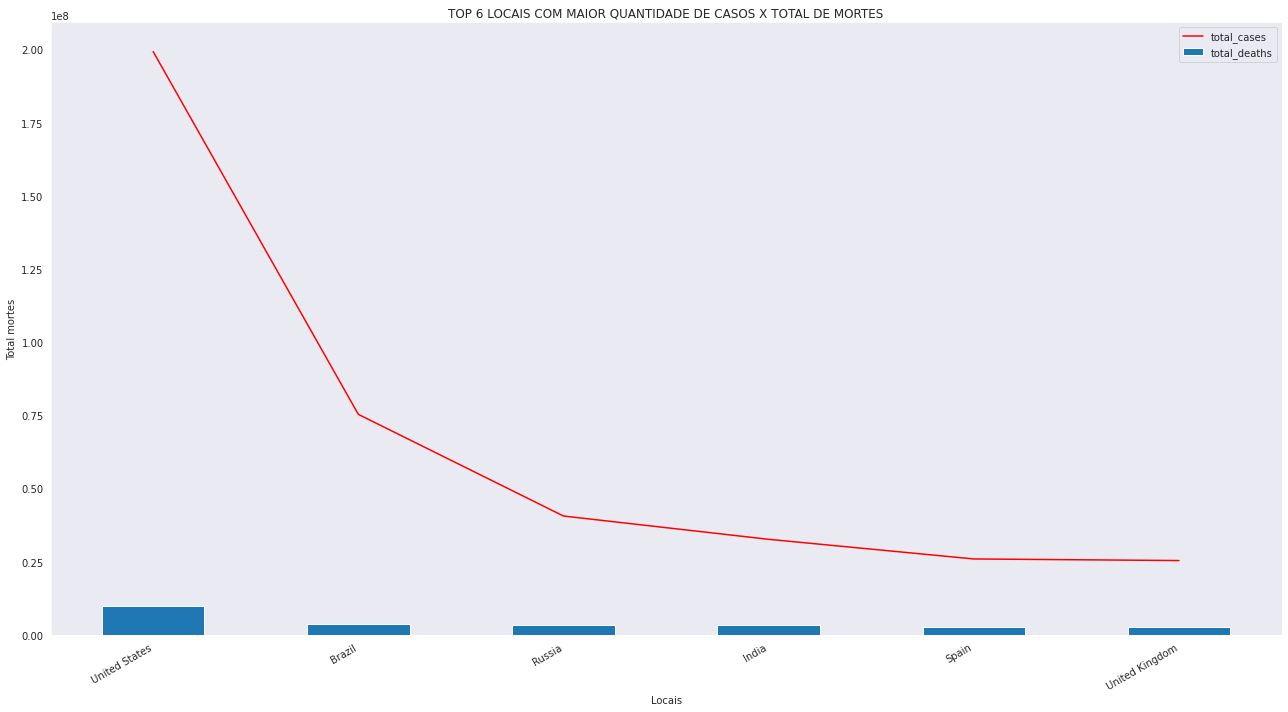

In [ ]:
#Informar somente os top6 locais e total de mortes
#Plotar figure
fig, ax = plt.subplots(figsize=(18,10))
 
#Plotar gráfico
dfp.groupby([df.location]).total_deaths.sum().sort_values(ascending=False)[:6].plot(kind='bar', ax=ax)
dfp.groupby([df.location]).total_cases.sum().sort_values(ascending=False)[:6].plot(ax=ax, color='red')
ax.set_title('TOP 6 LOCAIS COM MAIOR QUANTIDADE DE CASOS X TOTAL DE MORTES')
ax.set_xlabel('Locais')
ax.set_ylabel('Total mortes')
ax.legend()
fig.autofmt_xdate()
 
plt.tight_layout()

No gráfico acima podemos os totais de casos representados pela linha vermalha e o total de mortes representados pelas barras azuis, o país com maior quantidade de casos é os EUA, e consequentemente, maior números de mortes, logo na sequência temos o Brasil, o segundo maior em quantidade de casos, porém, a quantidade de mortes está bem próxima dos outros países com menos casos.

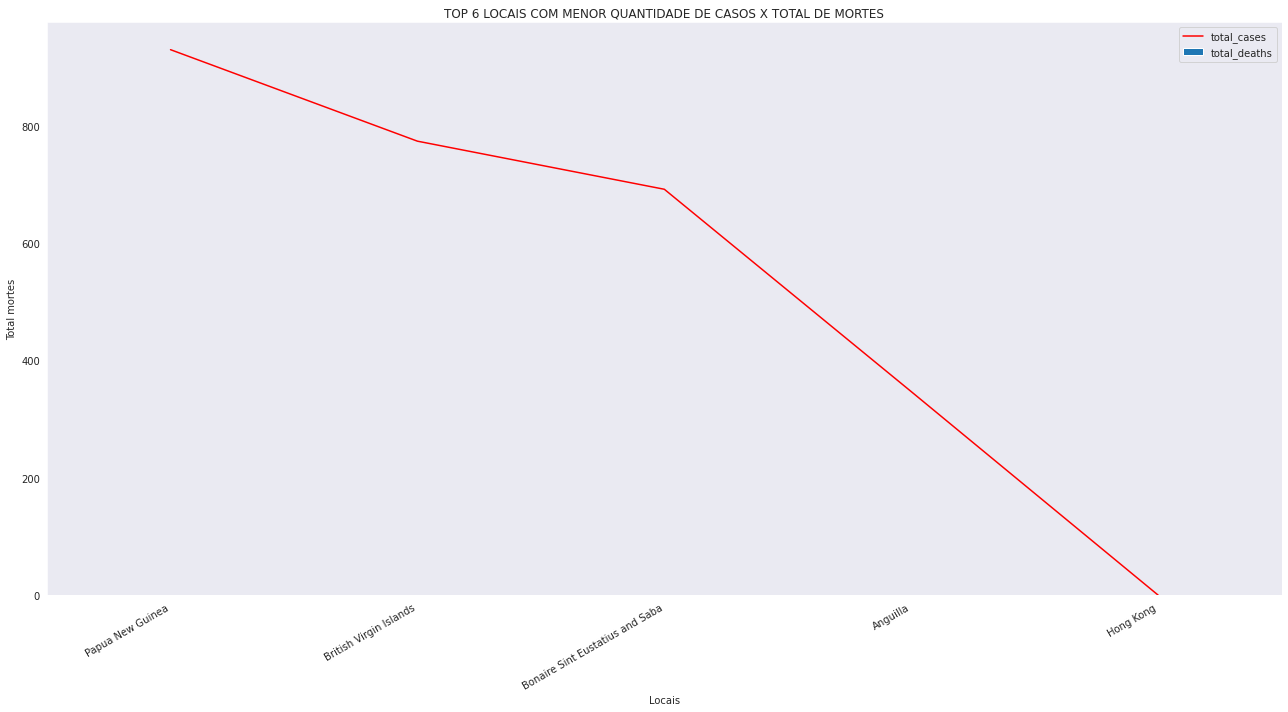

In [ ]:
#Informar somente os top6 locais e total de mortes
#Plotar figure
fig, ax = plt.subplots(figsize=(18,10))

#Plotar gráfico
dfp.groupby([df.location]).total_deaths.sum().sort_values(ascending=False).tail().plot(kind='bar', ax=ax)
dfp.groupby([df.location]).total_cases.sum().sort_values(ascending=False).tail().plot(ax=ax, color='red')
ax.set_title('TOP 6 LOCAIS COM MENOR QUANTIDADE DE CASOS X TOTAL DE MORTES')
ax.set_xlabel('Locais')
ax.set_ylabel('Total mortes')
ax.legend()
fig.autofmt_xdate()

plt.tight_layout()

Já neste gráfico temos os países com números de casos, porém, sem números de mortes, onde Hong Kong apresenta o mais próximo de 0 em números de casos.

Analisaremos a mortalidade, seguindo o cálculo onde vamos dividir o número de mortes pelo números de casos, e desta forma, descobrir o quanto é mortal o virús em cada país.

In [ ]:
#Definir mortalidade divivindo total de mortes pelo total de casos
mortalidade = dfp.total_deaths / dfp.total_cases
#Atribuir variável de mortalidade ao dataset
dfp['mortalidade'] = mortalidade
#Definir top 6 países com base no total de casos
top6paises = dfp.groupby([df.location]).total_cases.sum().sort_values(ascending=False)[:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


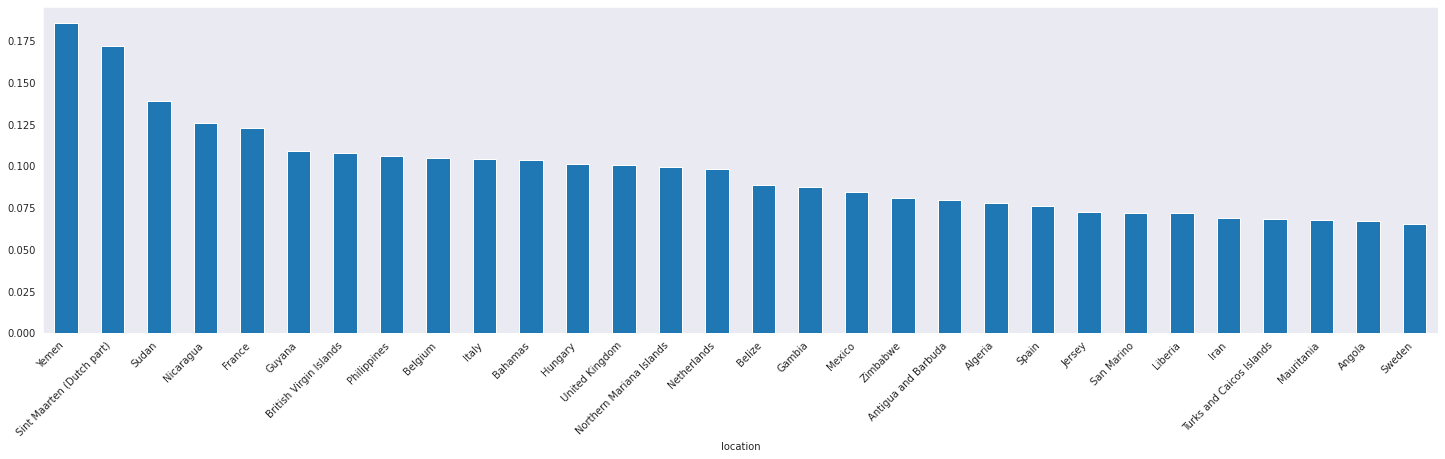

In [ ]:
#Plotar gráfico de países com a média diária das maiores taxas de mortalidade do COVID-19
dfp.groupby(['location']).mortalidade.mean().sort_values(ascending=False)[:30].plot(kind='bar', figsize=(25,6))
plt.xticks(rotation=45, ha='right');

Com a maior taxa de mortalidade temos o Yemem, um país Arabe que ocupa a extremidade sudoeste da Península da Arábia, com 17,5% de mortalidade do COVID-19,em segundo Sint Maarten constituinte do Reino dos Países Baixos no Caribe, e terceiro Sudan também um país Arabe, mas em meio a tantas notícias, somente nesta análise vi sobre o vírus nestes países, o que é preocupante, pois, não podemos só olhar para a quantidade de casos, no meu entender a letalidade é com certeza mais prejudicial aos países.

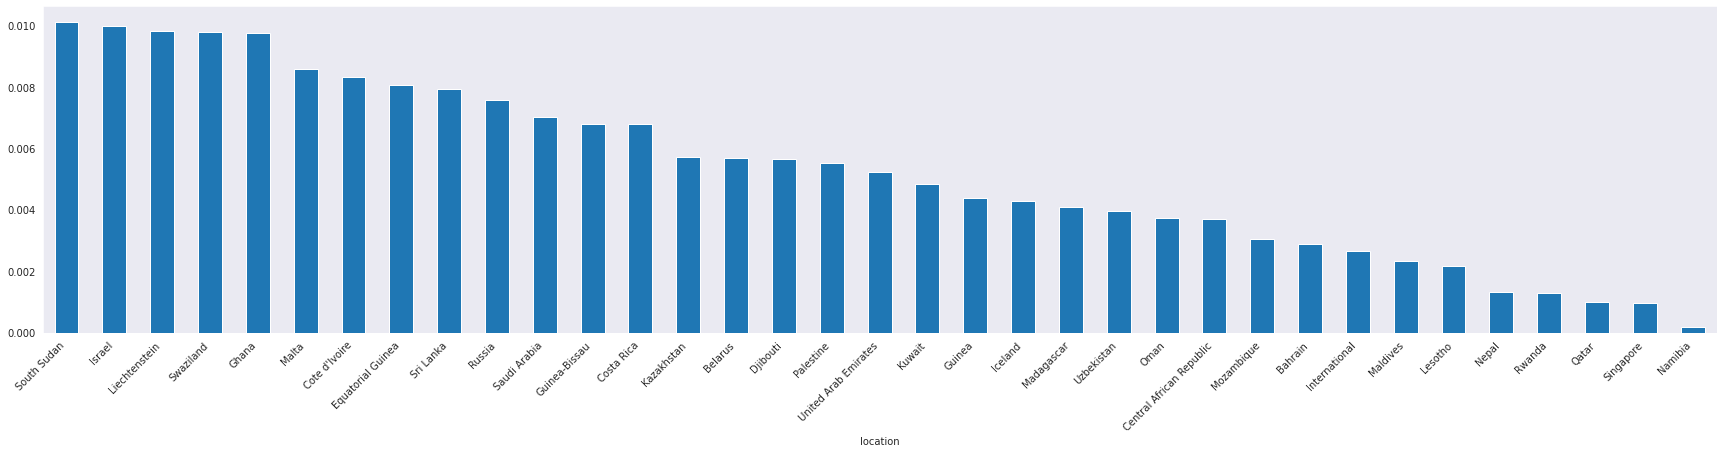

In [ ]:
#Plotar gráfico de países com a média diária das menores taxas de mortalidade do COVID-19
dfp.groupby(['location']).mortalidade.mean().sort_values(ascending=False)[150:185].plot(kind='bar', figsize=(30,6))
plt.xticks(rotation=45, ha='right');

Aqui podemos ver o inverso, países com a taxa de letalidade baixa, e bem próximo de 0, no gráfico podemos ver até mesmo países grandes, como a Russia.
Porém, não podemos ignorar o fato de que o vírus pode estar chegando agora em algum destes países.

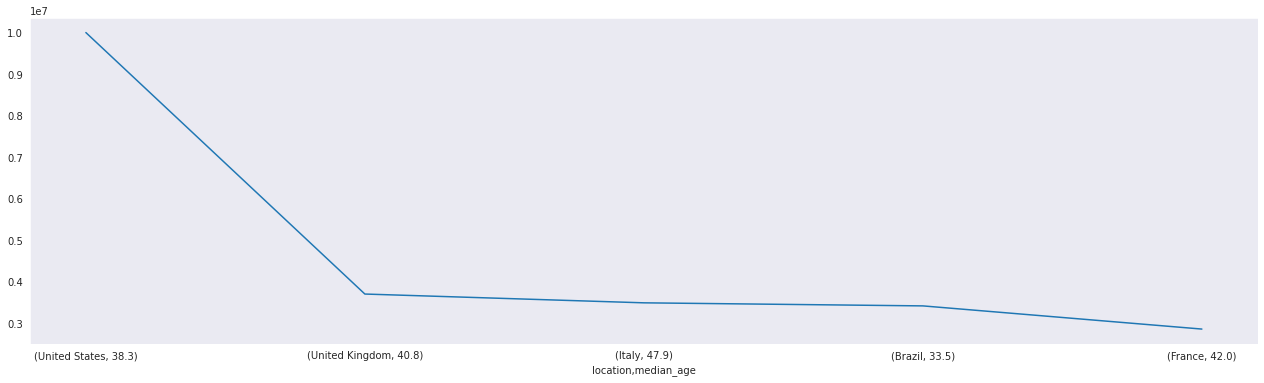

In [ ]:
#Locais com maior índice de mortes X média de idade da população
dfp2 = df.groupby(['location', 'median_age']).total_deaths.sum().sort_values(ascending=False)[1:6]

fig,ax = plt.subplots(figsize=(22,6))
dfp2.plot(x='median_age', y='total_deaths', ax=ax)
plt.show()

> No início da pandemia ouvia-se muito dizer que as pessoas de mais idade e os países com a média de idade mais alta seriam os que mais iriam sofrer com a pandemia, devido aos grupos de riscos.

> No gráfico acima temos a representação de total de mortes e a informação da média de idade da população, podemos identificar que as informações não vem tanto de encontro, pois, os EUA que tem uma média de idade da população de 38,3 é o país com mais casos no mundo.

In [ ]:
#Locais com maior índice de casos X média de idade da população
df.groupby(['location', 'population', 'median_age','aged_65_older', 'aged_70_older', 'life_expectancy']).total_cases.sum().sort_values(ascending=False)[1:7]

location        population    median_age  aged_65_older  aged_70_older  life_expectancy
United States   3.310026e+08  38.3        15.413         9.732          78.86              199328096.0
Brazil          2.125594e+08  33.5        8.552          5.060          75.88               75387413.0
Russia          1.459345e+08  39.6        14.178         9.393          72.58               40651288.0
India           1.380004e+09  28.2        5.989          3.414          69.66               32696094.0
Spain           4.675478e+07  45.5        19.436         13.799         83.56               25982552.0
United Kingdom  6.788600e+07  40.8        18.517         12.527         81.32               25440933.0
Name: total_cases, dtype: float64

> Com a tabela acima podemos confirmar as informações do gráfico, onde temos os EUA com 15,41% da população com 65 ou mais anos de idade, que é o país com mais número de mortes e casos, e a Italia que é o 6º país com mais casos, com uma média de idade da população de 47,9 e 23,02% da população com 65 ou mais anos de idade.


> Já que não identificamos um padrão para a quantidade de casos, iremos analisar o comportamento do governo em meio a pandemia, e suas respostas para sanar o problema, com a variável **stringency_index**, temos o Índice de Estresse da Resposta do Governo: medida composta baseada em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibições de viagens, redimensionados para um valor de 0 a 100 (100 = resposta mais estrita) 

In [ ]:
#Criar variáveis a partir da média de stringency_index por país 
United_States = df.loc[df['location'] == 'United States','stringency_index'].mean()
Brazil = df.loc[df['location'] == 'Brazil','stringency_index'].mean()
Russia = df.loc[df['location'] == 'Russia','stringency_index'].mean()
Spain = df.loc[df['location'] == 'Spain','stringency_index'].mean()
India = df.loc[df['location '] == 'India','stringency_index'].mean()
Italy = df.loc[df['location'] == 'Italy','stringency_index'].mean()
 
#Atribuir valores a um dicionário
dict_top6 = {'location' : ['United States', 'Brazil', 'Russia', 'Spain', 'India', 'Italy'],
             'stringency_index' : [United_States, Brazil, Russia, Spain, India, Italy]}
 
#Criar dataframe a partir do dicionário
df_stringency = pd.DataFrame(data=dict_top6)

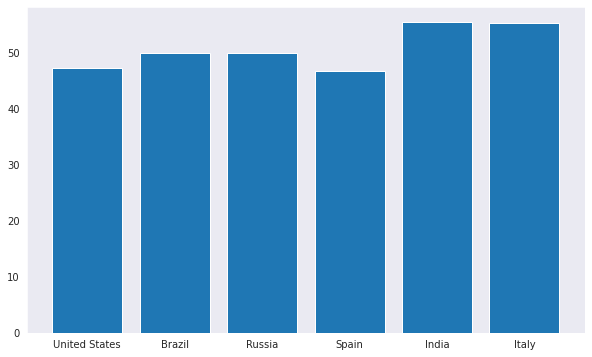

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar('location', 'stringency_index', data=df_stringency);

Podemos identificar uma leve tendência entre os países que tem mais casos (EUA e Brasil) com um índice menor de ação do governo, e conforme os demais países aparecem com menor número de casos, o índice de ação do governo aumenta, por este motivo, faremos uma análise mais a fundo, com outros países em comparação.

### Analisar dados sobre o Mundo

In [ ]:
#Selecionar no dataset somente casos referente ao "World"
df_world = df.loc[df['location'] == "World"]

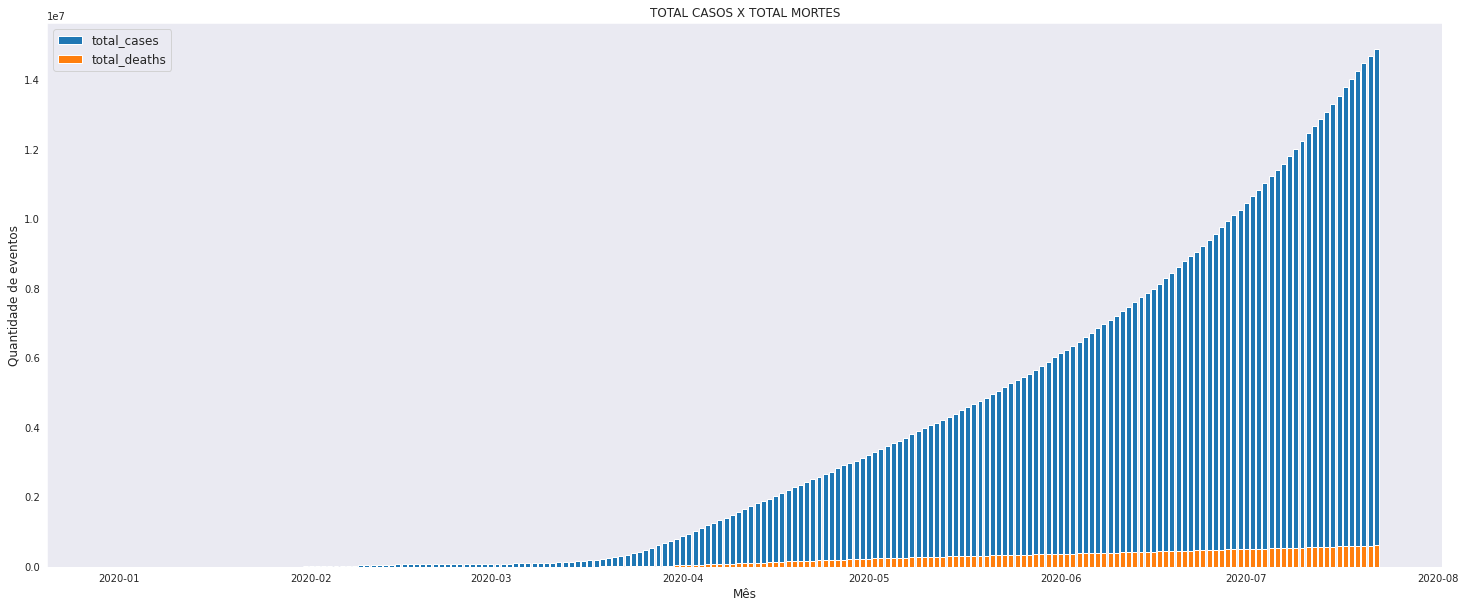

In [ ]:
#Plotar gráfico com total de casos X total de mortes pelo COVID-19 no mundo
fig, ax = plt.subplots(figsize=(25,10))
ax.bar('date', 'total_cases', data=df_world)
ax.bar('date', 'total_deaths', data=df_world)
ax.set_title("TOTAL CASOS X TOTAL MORTES")
ax.legend(['total_cases', 'total_deaths'], loc=2, fontsize=12)
ax.set_xlabel('Mês',fontsize=12)
ax.set_ylabel('Quantidade de eventos',fontsize=12)
plt.show();

> Ao analisar o gráfico, ainda não identificamos a curva indicando a diminuição dos casos, a quantidade de mortes é crescente, e seu aumento se dá a partir do mês 05/2020.

> Buscando informações em sites como [Wikipédia](https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data) busquei dados sobre recuperados, que acredito ser uma importante informação que não temos presente em nosso dataset. Na presente data temos 8,98 milhões de recuperados.

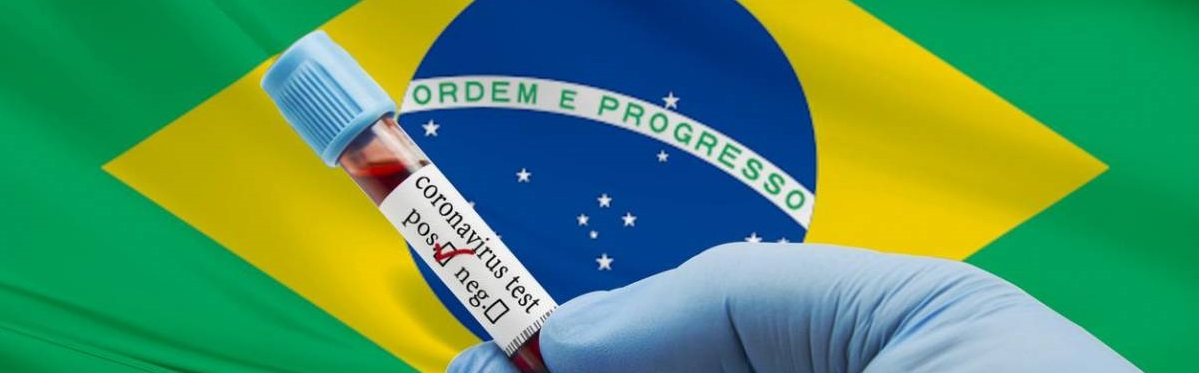

> Brasil, de acordo com Wikipédia, o maior país da América do Sul e da região da América Latina, sendo o quinto maior do mundo em área territorial (equivalente a 47,3% do território sul-americano) e sexto em população (com mais de 210 milhões de habitantes). 

> Hoje em meio a tantas noticias, extrairemos informações para análisar como está a situação do nosso país em meio a pandemia, uma vez que as informações repassadas pela mídia e redes sociais tem cada vez menos credibilidade.

In [ ]:
#Selecionar no dataset somente casos referente ao Brasil
df_br = df.loc[df['location'] == "Brazil"]

In [ ]:
#Extraindo informações da população Brasileira em 2020
df_br['population'].mean()

212559409.0

De acordo com as informações extraídas, os números convergem, hoje o Brasil tem uma população de 212 milhões de pessoas.

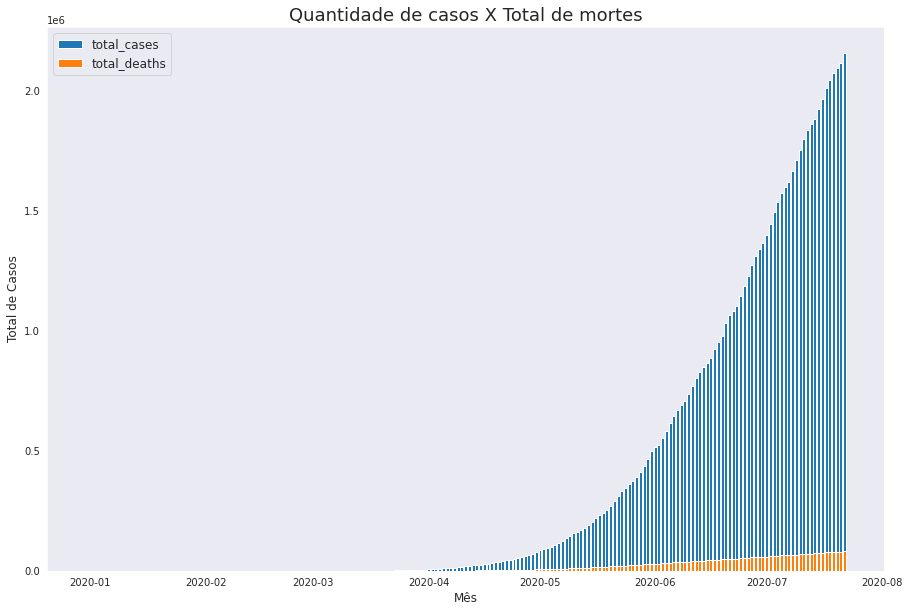

In [ ]:
#Plotar gráfico com total de casos
fig, ax = plt.subplots(figsize=(15,10))
ax.bar('date','total_cases', data=df_br)
ax.bar('date','total_deaths', data=df_br)
ax.set_title('Quantidade de casos X Total de mortes',fontsize=18)
ax.set_ylabel('Total de Casos',fontsize=12)
ax.set_xlabel("Mês",fontsize=12)
ax.legend(['total_cases', 'total_deaths'], loc=2, fontsize=12)
plt.show()

In [ ]:
#Imprimir informações do total de mortos
print("A quantidade de total de mortos na data de 21/07/2020 é de {}".format(df_br.loc[df_br['date'] == "2020-07-21"].total_deaths.sum()))

A quantidade de total de mortos na data de 21/07/2020 é de 80120.0


De acordo com o gráfico acima, o Brasil tem mais de 2 milhões de casos e a quantidade de total de mortos também vem crescendo, atualmente com 80120 mil mortes.

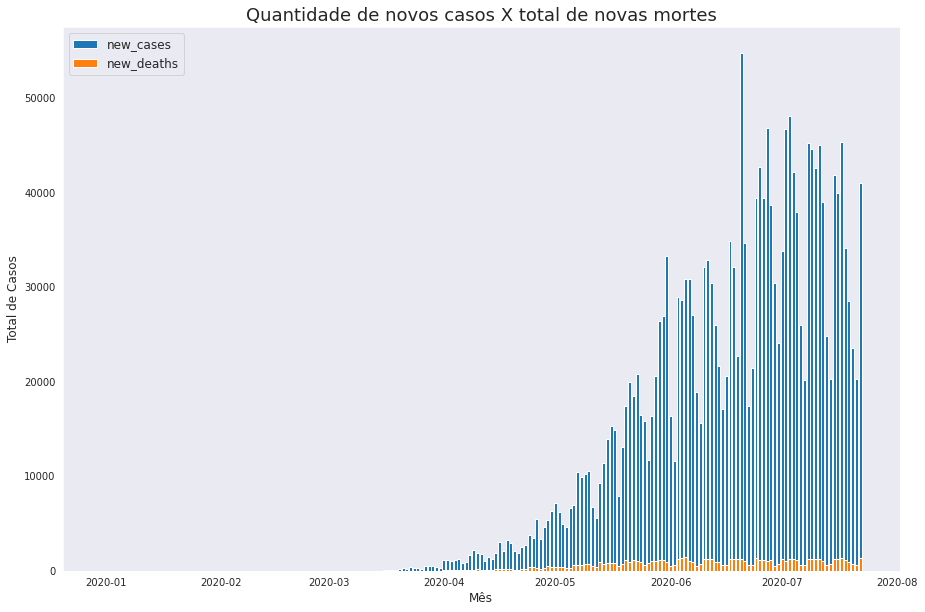

In [ ]:
#Plotar gráfico com total de casos
fig, ax = plt.subplots(figsize=(15,10))
ax.bar('date','new_cases', data=df_br)
ax.bar('date','new_deaths', data=df_br)
ax.set_title('Quantidade de novos casos X total de novas mortes',fontsize=18)
ax.set_ylabel('Total de Casos',fontsize=12)
ax.set_xlabel("Mês",fontsize=12)
ax.legend(['new_cases', 'new_deaths'], loc=2, fontsize=12)
plt.show()

Acima temos somente os "novos casos" ou seja, um gráfico que não soma as quantidades das datas anteriores, de acordo com este gráfico já passamos do pico em quantidade de números de casos, mas o númeruo de mortes se mantém subindo e descendo.

> Mas como sabemos o Brasil é um país com uma enorme população, mas quanto estes casos representam?

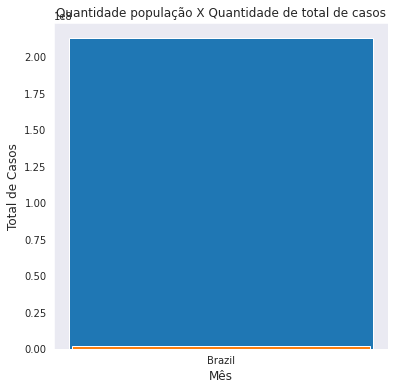

In [ ]:
#Selecionar dados de 21/07/2020
df_br_atual = df_br.loc[df_br['date'] == "2020-07-21"]

#Plotar gráfico com total de casos
fig, ax = plt.subplots(figsize=(6,6))
ax.bar('location', 'population', data=df_br_atual, width = 0.5)
ax.bar('location', 'total_cases', data=df_br_atual, width = 0.49)
ax.set_title('Quantidade população X Quantidade de total de casos',fontsize=12)
ax.set_ylabel('Total de Casos',fontsize=12)
ax.set_xlabel("Mês",fontsize=12)
plt.show()

In [ ]:
#Imprimir informações da população atingida pelo COVID-19
print("De acordo com as informações tivemos {:.2f} % da população atingida pelo COVID-19".format((df_br_atual['total_cases'].sum() / df_br_atual['population'].sum())))

De acordo com as informações tivemos 0.01 % da população atingida pelo COVID-19


> Sabend dos dados acima, agora analisaremos como está a taxa de mortalidade do vírus no Brasil e ver quais são os países que poderemos comparar com o Brasil:

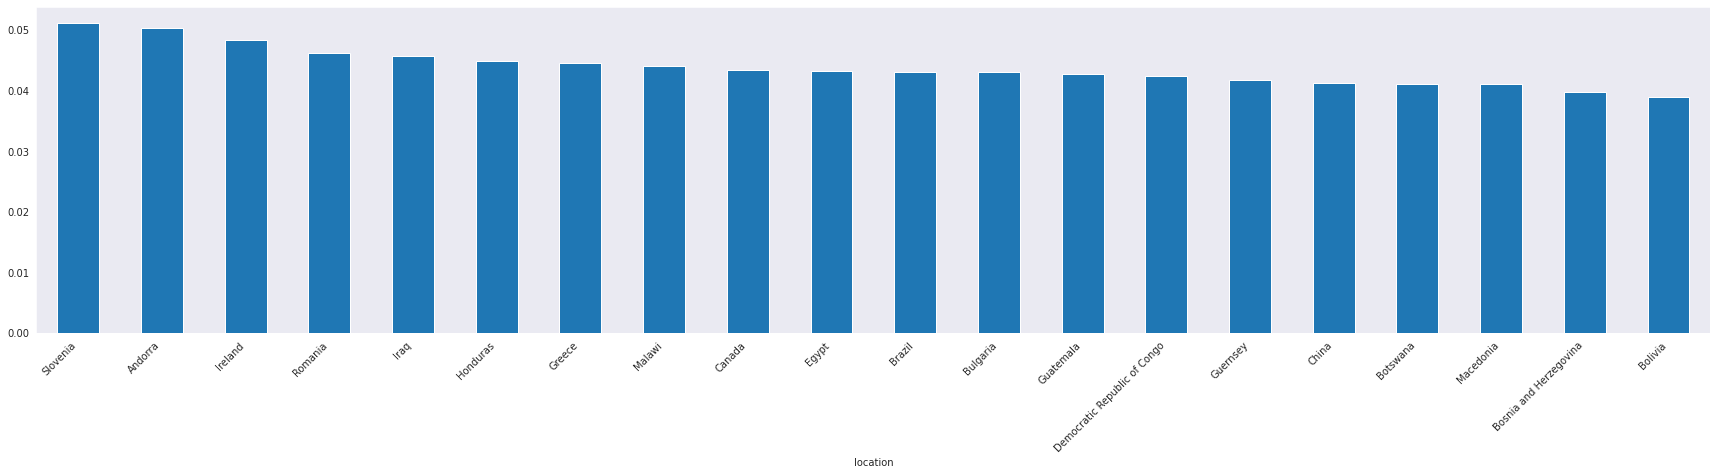

In [ ]:
#Plotar gráfico de países com a média diária das menores taxas de mortalidade do COVID-19
dfp.groupby(['location']).mortalidade.mean().sort_values(ascending=False)[45:65].plot(kind='bar', figsize=(30,6))
plt.xticks(rotation=45, ha='right');

In [ ]:
#Verificar número exato de taxa de mortalidade no Brasil
dfp.groupby(['location']).mortalidade.mean().sort_values(ascending=False)[55:56]

location
Brazil    0.043146
Name: mortalidade, dtype: float64

> No gráfico acima conseguimos analisar a taxa de mortalidade do vírus no Brasil, que é de 4,31%, ou seja, por mais que o Brasil tenha um grande número de infectados, que de acordo com os dados acima, ainda representa um número pequeno quando comparamos com sua população, não é o país com o quadro mais preocupande do vírus.

> Como também observamos nas comparações com outros países, o índice de ação do governo está abaixo da pontuação de 50 em uma escala de 0 a 100, ou seja, se o governo tomasse uma ação mais eficaz com relação aos cuidados com a população, poderíamos estar em uma situação mais confortável.